In [2]:
import numpy as np  # type:ignore
import matplotlib  # type:ignore
import matplotlib.pyplot as plt  # type:ignore
import os
import glob
from matplotlib.patches import Wedge  # type:ignore
import sys

sys.path.append(
    "/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/myLibrary"
)
sys.path.append(
    "/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/myLibrary"
)
import readFiles

"""
Aug 21, 2024
RVP

This script plots the radial pair distribution function for a particular size pair.
And also plots all size pairs together.

command:
python3 -c "from PDF_plots import PDF_plot; PDF_plot('all')"
python3 -c "from PDF_plots import PDF_AllPlots; PDF_AllPlots"
"""

# Modified plot RC parameters
plt.close("all")
plt.rcParams.update(
    {
        "figure.max_open_warning": 0,
        "text.usetex": True,
        "figure.autolayout": True,
        "font.family": "STIXGeneral",
        "mathtext.fontset": "stix",
        "font.size": 10,
        "axes.titlesize": 10,
        "figure.labelsize": 10,
        "figure.titlesize": 10,
        "legend.fontsize": 10,
        "legend.handlelength": 1,
        "legend.handletextpad": 0.5,
        "legend.borderpad": 0.5,
        "legend.borderaxespad": 0.5,
        "legend.columnspacing": 1,
        "legend.framealpha": 1,
        "legend.fancybox": True,
        "axes.grid": True,
        "axes.grid.axis": "both",
        "grid.alpha": 0.2,
        "grid.linewidth": 0.4,
        "xtick.labelsize": 10,
        "ytick.labelsize": 10,
        "lines.linewidth": 1,
        "lines.markersize": 5,
        "savefig.transparent": True,
        "savefig.pad_inches": 0.01,
        "savefig.format": "pdf",
        "savefig.bbox": "tight",
    }
)
plt.rcParams["text.latex.preamble"] = r"\usepackage{amsmath}"

In [10]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Simulation data mount point and figure save path.

# mac
#topDir = "/Volumes/rahul_2TB/high_bidispersity/new_data"
#fig_save_path = "/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/figures/paper"

# linux
topDir = "/media/rahul/rahul_2TB/high_bidispersity/new_data"
#fig_save_path = "/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/figures/paper/"

# Some simulation parameters.
npp    = 1000
numRun = 1
vr     = "0.75"
phi    = "0.76"
ar     = "1.4"
sizePair = "all"

dataname = f"{topDir}/NP_{npp}/phi_{phi}/ar_{ar}/Vr_{vr}/run_{numRun}"
if os.path.exists(dataname):
    datFile = glob.glob(f"{dataname}/PDF_{sizePair}_gxy2.txt")[0]
    xbin = np.genfromtxt(datFile, skip_header=1, max_rows=1)
    ybin = np.genfromtxt(datFile, skip_header=2, max_rows=1)
    gxy = np.genfromtxt(datFile, skip_header=5)

    ds = (
        arj if sizePair == "ll" else 1
    )  # unit distance (make sure 'arj' is defined if used)

    fig, ax = plt.subplots(figsize=(6, 5))
    c = ax.imshow(
        gxy,
        extent=[xbin[0], xbin[-1], ybin[0], ybin[-1]],
        origin="lower",
        aspect="equal",
        cmap="viridis",
    )

    ax.set_xlabel("x / d")
    ax.set_ylabel("y / d")
    ax.set_title("Pair Distribution Function $g_{xy}$")
    fig.colorbar(c, ax=ax, label="$g_{xy}$")

    plt.tight_layout()
    # Save if needed
    # plt.savefig(f"{fig_save_path}/gxy_heatmap.png", dpi=300)
    plt.show()
else:
    print(f"Data path does not exist: {dataname}")

In [11]:
gxy.shape

(19, 19)

In [3]:
import numpy as np

In [6]:
dr = .7
lx = 68.6227516261869
lz =68.6227516261869
rmax    = np.max([lx,lz])/2.
rbin    = np.arange(-rmax, rmax + dr, dr)

In [7]:
len(rbin)**2

10000

In [5]:
dtheta = 5    # in degrees
dr     = 0.2  # in unit length
off    = 100  # no. of timesteps to skip for steady state
lx = 68.6227516261869
lz =68.6227516261869
sizePair = 'all'
# Bin parameters
dtheta   *= np.pi/180  # converting to radians
rmin      = 1 #(np.max(particleSize) + np.min(minGap)) if sizePair == 'll' else (np.min(particleSize) + np.min(minGap))
rmax      = np.max([lx,lz])/2.
rbin      = np.arange(rmin,   rmax + dr,      dr)
thetabin  = np.arange(-np.pi, np.pi + dtheta, dtheta)

In [8]:
len(rbin) * len(thetabin)

12264

In [ ]:
import os
import glob
import numpy as np      # type: ignore
from   tqdm import tqdm # type: ignore
import readFiles        # type: ignore
import multiprocessing as mp

def compute_gxy(args):
    ij, ik, rbin, dr, dxij, dzij, pixSurf = args
    condxy = ((dxij >= rbin[ij]) & (dxij < rbin[ij] + dr) &
              (dzij >= rbin[ik]) & (dzij < rbin[ik] + dr))
    return ij, ik, np.sum(condxy) / pixSurf

'''
Apr 15, 2025
RVP
This script calculates the pair distribution function for a particular size pair with square pixels.

command:
python3 -c "from PDFcalc2 import PDF; PDF('all')"
'''

# Simulation data mount point
topDir = "/Volumes/rahul_2TB/high_bidispersity/new_data"
#topDir  = "/media/rahul/rahul_2TB/high_bidispersity/new_data"

# Simulation parameters.
npp     = 1000
phi     = [0.76]
ar      = [1.4]
vr      = '0.75'
numRuns = 1

# PDF parameters
dr  = 0.25   # in unit length
off = 100    # no. of timesteps to skip for steady state


    '''
    This function calculates the pair distribution function density for a particular size pair

    Input: sizePair - 'all', 'ss', 'sl' or 'll'
    '''
    global dr, off

    for j in range(len(phi)):
        phir = '{:.3f}'.format(phi[j]) if len(str(phi[j]).split('.')[1])>2 else '{:.2f}'.format(phi[j])
        if ar[j] == 1 and sizePair != 'all':
            print(f"     Skipping since ar = 1 and not all pairs are considered (phi = {phir})\n")
            continue  # Skip the rest of this iteration of the 'ar' loop

        for l in range (numRuns):
            dataname = f'{topDir}/NP_{npp}/phi_{phir}/ar_{ar[j]}/Vr_{vr}/run_{l+1}'
            if os.path.exists(dataname):
                # if os.path.exists(f'{dataname}/PDF_{sizePair}_g_r_theta.txt'):
                #     print(f'     PDF file already exists skipping - phi_{phir}/ar_{ar[j]}/Vr_{vr}/run_{l+1}\n')
                #     continue

                print(f'  Working on - phi_{phir}/ar_{ar[j]}/Vr_{vr}/run_{l+1}\n')
                ranSeedFile = glob.glob(f'{dataname}/random_*.dat')[0] #"random_seed.dat"
                datFile     = glob.glob(f'{dataname}/data_*')[0]
                parFile     = glob.glob(f'{dataname}/par_*')[0]
        
                # Readind particle sizes and reading parameters files into a list
                particleSize = np.genfromtxt(ranSeedFile, skip_header=2, usecols=-1)
                parList      = readFiles.parametersList(parFile)
        
                # Box dimensions
                lx = np.genfromtxt(datFile, skip_header=3, max_rows=1, comments = '_')[2]
                lz = np.genfromtxt(datFile, skip_header=5, max_rows=1, comments = '_')[2]
        
                # Reading simulation results
                data = np.loadtxt(datFile, skiprows=37).transpose()
                gamma, minGap = data[1], data[13]
        
                # Bin parameters
                #rmin    = (np.max(particleSize) + np.min(minGap)) if sizePair == 'll' else (np.min(particleSize) + np.min(minGap))
                rmax    = np.max([lx,lz])/2.
                rbin    = np.arange(-rmax, rmax + dr, dr)
                n_bins  = len(rbin)
                pixSurf = dr**2. # area of a pixel
                gxy     = np.zeros((len(rbin), len(rbin))) # initializing the PDF array
                SSi     = parList[off:] # parameter arrays for all time steps to consider
        
                for _, (ii, mat) in tqdm(enumerate(enumerate(SSi)), desc="Progress", leave=False, total=len(SSi)):
                    xp, zp, rp = mat[:,2], mat[:,3], mat[:,1] # all particle co-ordinates and radii
        
                    if sizePair in ['ss', 'll']:
                        cond   = (rp == 1) if sizePair == 'ss' else None
                        cond   = (rp  > 1) if sizePair == 'll' else None
                        xp, zp = xp[cond], zp[cond]
        
                    # Inter-particle distances array 
                    xmat, zmat = np.outer(xp, np.ones(len(xp))), np.outer(zp, np.ones(len(xp)))
                    dxij, dzij = xmat.transpose() - xmat,        zmat.transpose() - zmat
                    
                    # Lees Edwards boundary:
                    dxij[dzij >  lz/2.] -= gamma[ii]*lx
                    dzij[dzij >  lz/2.] -= lz
                    
                    dxij[dzij < -lz/2.] += gamma[ii]*lx
                    dzij[dzij < -lz/2.] += lz
                    
                    # X peridodic:
                    dxij[dxij >  lx/2.] -= lx
                    dxij[dxij < -lx/2.] += lx
                
                    if sizePair == 'sl':
                        for im in range(dxij.shape[0]):
                            for ikk in range(dzij.shape[1]):
                                cond2 = (mat[im,1] != mat[ikk,1])
                                dxij[im, ikk] *= cond2
                                dzij[im, ikk] *= cond2
        
                    del xp, zp, xmat, zmat

                    args_list = [(ij, ik, rbin, dr, dxij, dzij, pixSurf)
                                for ij in range(n_bins) for ik in range(n_bins)]

                    #gxy = np.zeros((n_bins, n_bins))

                    # Parallel execution
                    with mp.Pool(processes=mp.cpu_count()) as pool:
                        results = pool.map(compute_gxy, args_list)

                    # Fill gxy from results
                    for ij, ik, val in results:
                        gxy[ij, ik] = val
                            
                gxy /= len(SSi)
                gxy /= np.mean(gxy)
            
                # Writing the calculated PDF array into a text file
                txtFile = open(f'{dataname}/PDF_{sizePair}_gxy.txt', 'w')
                txtFile.write('# x bins \n')
                txtFile.write(" ".join(map(str, rbin)))
                txtFile.write("\n\n")
        
                txtFile.write('# y bins \n')
                txtFile.write(" ".join(map(str, rbin)))
                txtFile.write("\n\n")
        
                txtFile.write("\n".join(" ".join(map(str, row)) for row in gxy) + "\n")
                txtFile.close()
        
                print(f'\n    Done - NP_{str(npp)}/phi_{phir}/ar_{str(ar[j])}/Vr_{vr}/run_{l+1}\n')
                del gxy
                
            else:
                print(f'{dataname} - Not found')

In [2]:
import multiprocessing as mp

print("Available CPUs:", mp.cpu_count())

Available CPUs: 8


In [8]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

# Simulation data mount point (mac)
topDir  = "/Volumes/rahul_2TB/high_bidispersity/new_data"

# Simulation parameters
npp      = 1000
numRun   = 1
vr       = "0.75"
phi      = "0.76"
ar       = "1.4"
sizePair = "all"

dataname = f"{topDir}/NP_{npp}/phi_{phi}/ar_{ar}/Vr_{vr}/run_{numRun}"
kk = -1

if os.path.exists(dataname):
    datFile = glob.glob(f'{dataname}/PDF_{sizePair}_g_r_theta.txt')[0]
    rbin = np.genfromtxt(datFile, skip_header=1, max_rows=1)
    thetabin = np.genfromtxt(datFile, skip_header=2, max_rows=1)
    g_r_theta = np.genfromtxt(datFile, skip_header=5)

    ds = float(ar) if sizePair == 'll' else 1  # unit distance
    plim = 5
    tdist = ds * plim
    #rlim  = np.abs(rbin - tdist * np.sqrt(2) * 1.1).argmin()
    rlim  = np.abs(rbin - tdist * np.sqrt(2)*1.1).argmin()
    
    fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})

    norm = Normalize(vmin=np.min(g_r_theta), vmax=np.max(g_r_theta))
    cmap = plt.cm.viridis

    for ii in range(len(rbin[:rlim]) - 1):
        for jj in range(len(thetabin) - 1):
            theta_start = np.degrees(thetabin[jj])
            theta_end = np.degrees(thetabin[jj + 1])
            r_start = rbin[ii]
            r_end = rbin[ii + 1]
            value = g_r_theta[ii, jj]

            wedge = Wedge(
                (0, 0), r_end, theta_start, theta_end,
                width=r_end - r_start,
                facecolor=cmap(norm(value)),
                edgecolor='none',
                transform=ax.transData
            )
            ax.add_patch(wedge)

    sm = ScalarMappable(norm=norm, cmap=cmap)
    cbar = fig.colorbar(sm, ax=ax, label=r"$g_{xy}$")

    ax.set_xlabel("x / d")
    ax.set_ylabel("y / d")
    ax.set_xlim([-tdist, tdist])
    ax.set_ylim([-tdist, tdist])
    ax.set_title("Pair Distribution Function $g_{xy}$")

    plt.tight_layout()
    plt.show()

In [2]:
import matplotlib.gridspec as gridspec

# Simulation data mount point and figure save path.

#mac
topDir        = "/Volumes/rahul_2TB/high_bidispersity/new_data"
fig_save_path = "/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/figures/paper"

#linux
#topDir        = "/media/rahul/rahul_2TB/high_bidispersity/new_data"
#fig_save_path = "/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/figures/paper/"

# Some simulation parameters.
npp      = 1000
numRun   = 1
vr       = '0.5'

# phi and ar lists should be the same size
phi = [0.76, 0.77, 0.80]
ar  = [1.4, 2.0, 4.0]

sizePairs  = ['ss', 'sl', 'll', 'all']
label_list = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)', 
              '(g)', '(h)', '(i)', '(j)', '(k)', '(l)']

fig = plt.figure(figsize=(9, 11), constrained_layout =True)  # Enable constrained layout
gs = gridspec.GridSpec(len(sizePairs), len(phi), figure=fig, hspace=0.05, wspace=0.02)  # Remove hspace & wspace (handled automatically)
ax = [[fig.add_subplot(gs[i, j]) for j in range(len(phi))] for i in range(len(sizePairs))]

kk = -1
for i, sizePair in enumerate(sizePairs):
    g_r_theta_row = []
    for j, phij in enumerate(phi):
        phir = '{:.3f}'.format(phij) if len(str(phij).split('.')[1]) > 2 else '{:.2f}'.format(phij)
        arj  = ar[j]
        dataname = f'{topDir}/NP_{npp}/phi_{phir}/ar_{arj}/Vr_{vr}/run_{numRun}'
        if os.path.exists(dataname): 
            datFile   = glob.glob(f'{dataname}/PDF_{sizePair}_*.txt')[0]
            rbin      = np.genfromtxt(datFile, skip_header=1, max_rows=1)
            thetabin  = np.genfromtxt(datFile, skip_header=2, max_rows=1)
            g_r_theta = np.genfromtxt(datFile, skip_header=5)
                
            ds    = arj if sizePair == 'll' else 1 # unit distance
            plim  = 5 # going upto certain particles far
            tdist = ds*plim
            rlim  = np.abs(rbin - tdist*np.sqrt(2)*1.1).argmin() # closest index from plim*ds
           
            for ii in range(len(rbin[0:rlim]) - 1):
                for jj in range(len(thetabin) - 1):
                    theta_start = np.degrees(thetabin[jj])
                    theta_end   = np.degrees(thetabin[jj + 1])
                    r_start     = rbin[ii]
                    r_end       = rbin[ii + 1]
    
                    g_r_theta_row.append(g_r_theta[ii, jj])
                    wedge = Wedge(
                        (0, 0), r_end, theta_start, theta_end,
                        width     = r_end - r_start,
                        facecolor = plt.cm.viridis(g_r_theta[ii, jj]),
                        edgecolor = 'none',
                        transform = ax[i][j].transData._b)
                    ax[i][j].add_patch(wedge)
                    
            ax[i][j].set_aspect('equal')
            ax[i][j].set_xlim([-tdist, tdist])
            ax[i][j].set_ylim([-tdist, tdist])
            ax[i][j].grid(False)
            ax[0][j].set_title(fr'$\boldsymbol{{\delta = {arj}}}$', fontsize=13)
            ax[i][0].set_ylabel(r'$\mathbf{r / a_{s}}$', fontsize=12)
            ax[-1][j].set_xlabel(r'$\mathbf{r / a_{s}}$', fontsize=12)

            if j != 0:
                ax[i][j].set_yticklabels([])
                ax[i][j].set_yticks([])

            if sizePair != sizePairs[-1]:
                ax[i][j].set_xticklabels([])
                ax[i][j].set_xticks([])

            kk += 1
            ax[i][j].text(0.05, 0.95, r'\textbf{' + label_list[kk] + '}', 
                          transform=ax[i][j].transAxes, fontsize=14, 
                          verticalalignment='top', 
                          horizontalalignment='left', color='white')
                    
            del rbin, thetabin, g_r_theta
            
    sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=np.min(g_r_theta_row), vmax=np.max(g_r_theta_row)))
    sm.set_array([]) 
    cbar = fig.colorbar(sm, ax=ax[i][j], fraction=0.05, pad=0.06, shrink=0.8, aspect=20, extend='max')
    cbar.set_label(r'$g(r,\theta)$', fontsize=12)
    
    del g_r_theta_row

fig.savefig(f'{fig_save_path}/PDF_vr_{vr}.pdf', bbox_inches = "tight", dpi = 500)
plt.show()

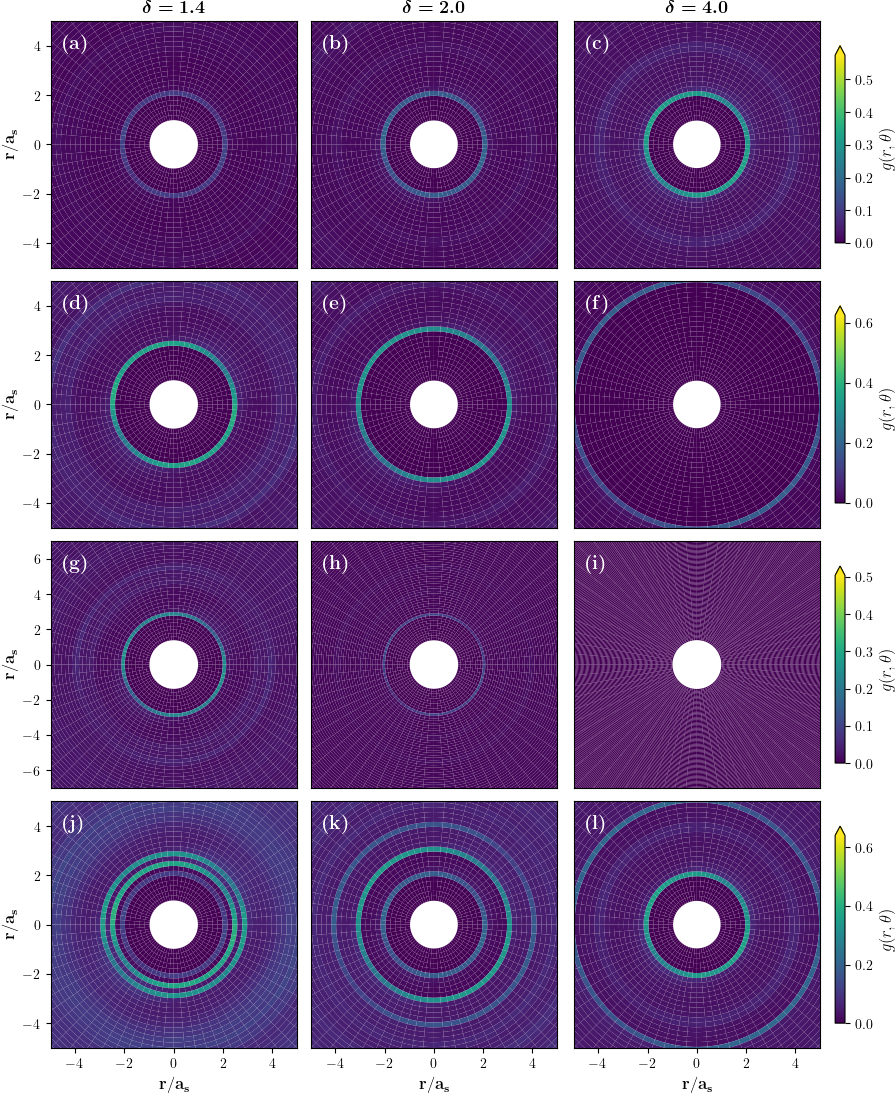

In [3]:
import matplotlib.gridspec as gridspec

# Simulation data mount point and figure save path.

#mac
topDir        = "/Volumes/rahul_2TB/high_bidispersity/new_data"
fig_save_path = "/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/figures/paper"

#linux
#topDir        = "/media/rahul/rahul_2TB/high_bidispersity/new_data"
#fig_save_path = "/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/figures/paper/"

# Some simulation parameters.
npp      = 1000
numRun   = 1
vr       = '0.25'

# phi and ar lists should be the same size
phi      = [0.76, 0.77, 0.795]
ar       = [1.4, 2.0, 4.0]

sizePairs  = ['ss', 'sl', 'll', 'all']
label_list = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)', 
              '(g)', '(h)', '(i)', '(j)', '(k)', '(l)']

fig = plt.figure(figsize=(9, 11), constrained_layout =True)  # Enable constrained layout
gs = gridspec.GridSpec(len(sizePairs), len(phi), figure=fig, hspace=0.05, wspace=0.02)  # Remove hspace & wspace (handled automatically)
ax = [[fig.add_subplot(gs[i, j]) for j in range(len(phi))] for i in range(len(sizePairs))]

kk = -1
for i, sizePair in enumerate(sizePairs):
    g_r_theta_row = []
    for j, phij in enumerate(phi):
        phir = '{:.3f}'.format(phij) if len(str(phij).split('.')[1]) > 2 else '{:.2f}'.format(phij)
        arj  = ar[j]
        dataname = f'{topDir}/NP_{npp}/phi_{phir}/ar_{arj}/Vr_{vr}/run_{numRun}'
        if os.path.exists(dataname): 
            datFile   = glob.glob(f'{dataname}/PDF_{sizePair}_*.txt')[0]
            rbin      = np.genfromtxt(datFile, skip_header=1, max_rows=1)
            thetabin  = np.genfromtxt(datFile, skip_header=2, max_rows=1)
            g_r_theta = np.genfromtxt(datFile, skip_header=5)
                
            ds    = arj if sizePair == 'll' else 1 # unit distance
            plim  = 5 # going upto certain particles far
            tdist = ds*plim
            rlim  = np.abs(rbin - tdist*np.sqrt(2)*1.1).argmin() # closest index from plim*ds
           
            for ii in range(len(rbin[0:rlim]) - 1):
                for jj in range(len(thetabin) - 1):
                    theta_start = np.degrees(thetabin[jj])
                    theta_end   = np.degrees(thetabin[jj + 1])
                    r_start     = rbin[ii]
                    r_end       = rbin[ii + 1]
    
                    g_r_theta_row.append(g_r_theta[ii, jj])
                    wedge = Wedge(
                        (0, 0), r_end, theta_start, theta_end,
                        width     = r_end - r_start,
                        facecolor = plt.cm.viridis(g_r_theta[ii, jj]),
                        edgecolor = 'none',
                        transform = ax[i][j].transData._b)
                    ax[i][j].add_patch(wedge)
                    
            ax[i][j].set_aspect('equal')
            ax[i][j].set_xlim([-tdist, tdist])
            ax[i][j].set_ylim([-tdist, tdist])
            ax[i][j].grid(False)
            ax[0][j].set_title(fr'$\boldsymbol{{\delta = {arj}}}$', fontsize=13)
            ax[i][0].set_ylabel(r'$\mathbf{r / a_{s}}$', fontsize=12)
            ax[-1][j].set_xlabel(r'$\mathbf{r / a_{s}}$', fontsize=12)

            if j != 0:
                ax[i][j].set_yticklabels([])
                ax[i][j].set_yticks([])

            if sizePair != sizePairs[-1]:
                ax[i][j].set_xticklabels([])
                ax[i][j].set_xticks([])

            kk += 1
            ax[i][j].text(0.05, 0.95, r'\textbf{' + label_list[kk] + '}', 
                          transform=ax[i][j].transAxes, fontsize=14, 
                          verticalalignment='top', 
                          horizontalalignment='left', color='white')
                    
            del rbin, thetabin, g_r_theta
            
    sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=np.min(g_r_theta_row), vmax=np.max(g_r_theta_row)))
    sm.set_array([]) 
    cbar = fig.colorbar(sm, ax=ax[i][j], fraction=0.05, pad=0.06, shrink=0.8, aspect=20, extend='max')
    cbar.set_label(r'$g(r,\theta)$', fontsize=12)
    
    del g_r_theta_row

fig.savefig(f'{fig_save_path}/PDF_vr_{vr}.pdf', bbox_inches = "tight", dpi = 500)
plt.show()

In [6]:
import matplotlib.gridspec as gridspec

# Simulation data mount point and figure save path.

#mac
#topDir        = "/Volumes/rahul_2TB/high_bidispersity/new_data"
#fig_save_path = "/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/figures/paper"

#linux
topDir        = "/media/rahul/rahul_2TB/high_bidispersity/new_data"
fig_save_path = "/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/figures/paper"

# Some simulation parameters.
npp      = 1000
numRun   = 1
vr       = '0.75'

# phi and ar lists should be the same size
phi      = [0.76, 0.77, 0.78]
ar       = [1.4, 2.0, 4.0]

sizePairs  = ['ss', 'sl', 'll', 'all']
label_list = ['(m)', '(n)', '(o)', '(p)', '(q)', '(r)', 
              '(s)', '(t)', '(u)', '(v)', '(w)', '(x)']

fig = plt.figure(figsize=(9, 11), constrained_layout =True)  # Enable constrained layout
gs = gridspec.GridSpec(len(sizePairs), len(phi), figure=fig, hspace=0.05, wspace=0.02)  # Remove hspace & wspace (handled automatically)
ax = [[fig.add_subplot(gs[i, j]) for j in range(len(phi))] for i in range(len(sizePairs))]

kk = -1
for i, sizePair in enumerate(sizePairs):
    g_r_theta_row = []
    for j, phij in enumerate(phi):
        phir = '{:.3f}'.format(phij) if len(str(phij).split('.')[1]) > 2 else '{:.2f}'.format(phij)
        arj  = ar[j]
        dataname = f'{topDir}/NP_{npp}/phi_{phir}/ar_{arj}/Vr_{vr}/run_{numRun}'
        if os.path.exists(dataname): 
            datFile   = glob.glob(f'{dataname}/PDF_{sizePair}_*.txt')[0]
            rbin      = np.genfromtxt(datFile, skip_header=1, max_rows=1)
            thetabin  = np.genfromtxt(datFile, skip_header=2, max_rows=1)
            g_r_theta = np.genfromtxt(datFile, skip_header=5)
                
            ds    = arj if sizePair == 'll' else 1 # unit distance
            plim  = 5 # going upto certain particles far
            tdist = ds*plim
            rlim  = np.abs(rbin - tdist*np.sqrt(2)*1.1).argmin() # closest index from plim*ds
           
            for ii in range(len(rbin[0:rlim]) - 1):
                for jj in range(len(thetabin) - 1):
                    theta_start = np.degrees(thetabin[jj])
                    theta_end   = np.degrees(thetabin[jj + 1])
                    r_start     = rbin[ii]
                    r_end       = rbin[ii + 1]
    
                    g_r_theta_row.append(g_r_theta[ii, jj])
                    wedge = Wedge(
                        (0, 0), r_end, theta_start, theta_end,
                        width     = r_end - r_start,
                        facecolor = plt.cm.viridis(g_r_theta[ii, jj]),
                        edgecolor = 'none',
                        transform = ax[i][j].transData._b)
                    ax[i][j].add_patch(wedge)
                    
            ax[i][j].set_aspect('equal')
            ax[i][j].set_xlim([-tdist, tdist])
            ax[i][j].set_ylim([-tdist, tdist])
            ax[i][j].grid(False)
            ax[0][j].set_title(fr'$\boldsymbol{{\delta = {arj}}}$', fontsize=13)
            ax[i][0].set_ylabel(r'$\mathbf{r / a_{s}}$', fontsize=12)
            ax[-1][j].set_xlabel(r'$\mathbf{r / a_{s}}$', fontsize=12)

            if j != 0:
                ax[i][j].set_yticklabels([])
                ax[i][j].set_yticks([])

            if sizePair != sizePairs[-1]:
                ax[i][j].set_xticklabels([])
                ax[i][j].set_xticks([])

            kk += 1
            ax[i][j].text(0.05, 0.95, r'\textbf{' + label_list[kk] + '}', 
                          transform=ax[i][j].transAxes, fontsize=14, 
                          verticalalignment='top', 
                          horizontalalignment='left', color='white')
                    
            del rbin, thetabin, g_r_theta
            
    sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=np.min(g_r_theta_row), vmax=np.max(g_r_theta_row)))
    sm.set_array([]) 
    cbar = fig.colorbar(sm, ax=ax[i][j], fraction=0.05, pad=0.06, shrink=0.8, aspect=20, extend='max')
    cbar.set_label(r'$g(r,\theta)$', fontsize=12)
    
    del g_r_theta_row

fig.savefig(f'{fig_save_path}/PDF_vr_{vr}.pdf', bbox_inches = "tight", dpi = 500)
plt.show()

<Figure size 640x480 with 0 Axes>

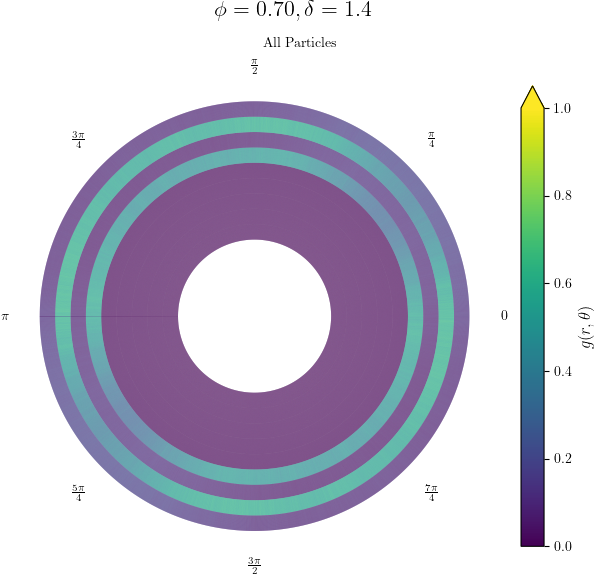

In [2]:
# Simulation data mount point and figure save path.
topDir        = "/media/rahul/Rahul_2TB/high_bidispersity"
fig_save_path = "/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/Research/Bidisperse Project/analysis/figures/PDF"

# Some simulation parameters.
NP          = [1000]

run         = {500:8,1000:1,2000:2,4000:1}

phi         = [0.70]

ar          = [1.4]

sizePairs   = ['all', 'ss', 'sl', 'll']

def PDF_plot(sizePair = 'all', figsave = True):
    '''
    Plotting PDF radial figures for a size pair

    Input: sizePair - 'all', 'ss', 'sl' or 'll'
    '''
    global sizePairs
    bottomDet = ['All Particles', 'Small-Small Particles', 'Small-large Particles', 'Large-Large Particles']

    plt.clf()

    for i in range(len(NP)):
        for j in range(len(phi)):
            phir = '{:.3f}'.format(phi[j]) if len(str(phi[j]).split('.')[1]) > 2 else '{:.2f}'.format(phi[j])
            for k in range(len(ar)):
                if ar[k] == 1 and sizePair != 'all':
                    print(f"\n     Skipping since ar = 1 and not all pairs are considered (phi = {phir})")
                    continue
                for l in range(run[NP[i]]):
                    dataname = f'{topDir}/NP_{NP[i]}/phi_{phir}/ar_{ar[k]}/Vr_0.5/run_{l+1}'
                    if os.path.exists(dataname): 
                        datFile   = glob.glob(f'{dataname}/PDF_{sizePair}_*.txt')[0]
                        rbin      = np.genfromtxt(datFile, skip_header=1, max_rows=1)
                        thetabin  = np.genfromtxt(datFile, skip_header=2, max_rows=1)
                        g_r_theta = np.genfromtxt(datFile, skip_header=5)
                        
                        fig, ax = plt.subplots(subplot_kw = {'projection': 'polar'}, figsize=(8,6))
                        ax.grid(False)

                        rlim = 10 # far limit for plotting

                        for ii in range(len(rbin[0:rlim]) - 1):
                            for j in range(len(thetabin) - 1):
                                theta_start = np.degrees(thetabin[j])
                                theta_end = np.degrees(thetabin[j + 1])
                                r_start = rbin[ii]
                                r_end = rbin[ii + 1]

                                wedge = Wedge(
                                    (0, 0), r_end, theta_start, theta_end,
                                    width=r_end - r_start,
                                    facecolor=plt.cm.viridis(g_r_theta[ii, j]),
                                    #edgecolor=(1, 1, 1, 0.5),  # Set the edge color to white
                                    edgecolor='none',
                                    #linewidth=0.01, 
                                    #antialiased=True,
                                    transform=ax.transData._b
                                )
                                ax.add_patch(wedge)

                        ax.set_ylim(0, rbin[rlim])
                        sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=0, vmax=1)) #norm=plt.Normalize(vmin=g_r_theta.min(), vmax=g_r_theta.max()))
                        sm.set_array([])
                        cbar = fig.colorbar(sm, ax=ax, fraction=0.0455, pad=0.05, extend='max')  # Increase 'pad' to move the colorbar to the right
                        cbar.set_label(r'$g(r,\theta)$', fontsize=12)  
                        ticks = np.arange(0, 2 * np.pi, np.pi/4)  # Define ticks from 0 to 2π every π/4 radians
                        ax.set_xticks(ticks)  # Set the angular ticks

                        # Label ticks in terms of pi
                        angle_labels = [r'0', r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$', r'$\frac{3\pi}{4}$',
                                        r'$\pi$', r'$\frac{5\pi}{4}$', r'$\frac{3\pi}{2}$', r'$\frac{7\pi}{4}$']
                        ax.set_xticklabels(angle_labels)
                        ax.set_yticklabels([])
                        ax.spines['polar'].set_visible(False)
                        ax.set_title(f'{bottomDet[sizePairs.index(sizePair)]}', va='bottom', x=0.6)

                        fig.suptitle(fr'$\phi = {phir}, \delta = {ar[k]}$', fontsize=16, x=0.6)

                        #plt.tight_layout()
                        if figsave:
                            figFormat     = ".jpeg"
                            #plt.savefig(fig_save_path + '/angularForcesAllSizePair_NP_' + str(npp) + '_phi_' + str(phii) + '_ar_' + str(arr) + figFormat, bbox_inches = "tight", dpi = 500)
                            #plt.savefig(f'{fig_save_path}/PDF_{sizePair}_NP_{NP[i]}_phi_{phir}_ar_{ar[k]}_run_{l+1}{figFormat}', bbox_inches="tight", dpi=300)
                        plt.show()

PDF_plot('all')

<Figure size 640x480 with 0 Axes>

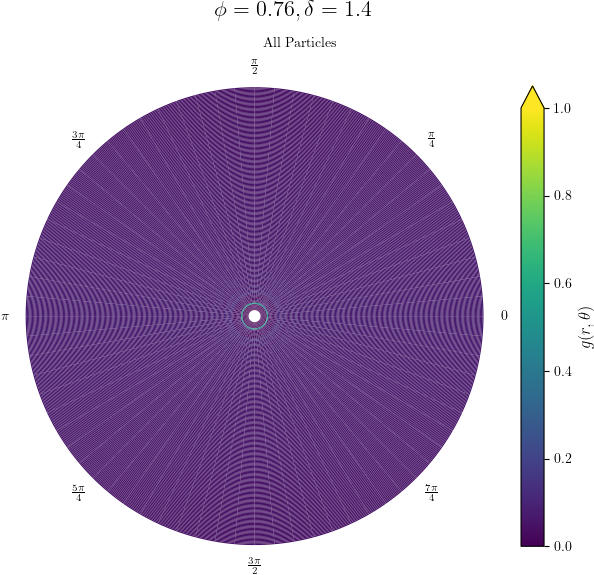

In [12]:
# Simulation data mount point and figure save path.
topDir      = "/Volumes/rahul_2TB/high_bidispersity/new_data"
fig_save_path = "/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/Research/Bidisperse Project/analysis/figures/PDF"

# Some simulation parameters.
npp      = 1000
numRuns  = 1
vr       = '0.5'

phi = [0.76]
ar  = [1.4]
sizePair   = 'ss'

bottomDet = ['All Particles', 'Small-Small Particles', 'Small-large Particles', 'Large-Large Particles']

plt.clf()

for j in range(len(phi)):
    phir = '{:.3f}'.format(phi[j]) if len(str(phi[j]).split('.')[1]) > 2 else '{:.2f}'.format(phi[j])
    if ar[j] == 1 and sizePair != 'all':
        print(f"\n     Skipping since ar = 1 and not all pairs are considered (phi = {phir})")
        continue
    for l in range(numRuns):
        dataname = f'{topDir}/NP_{npp}/phi_{phir}/ar_{ar[j]}/Vr_{vr}/run_{l+1}'
        if os.path.exists(dataname): 
            datFile   = glob.glob(f'{dataname}/PDF_{sizePair}_*.txt')[0]
            rbin      = np.genfromtxt(datFile, skip_header=1, max_rows=1)
            thetabin  = np.genfromtxt(datFile, skip_header=2, max_rows=1)
            g_r_theta = np.genfromtxt(datFile, skip_header=5)

            fig, ax = plt.subplots(subplot_kw = {'projection': 'polar'}, figsize=(8,6))
            ax.grid(False)

            rlim = 181 # far limit for plotting

            for ii in range(len(rbin[0:rlim]) - 1):
                for jj in range(len(thetabin) - 1):
                    theta_start = np.degrees(thetabin[jj])
                    theta_end   = np.degrees(thetabin[jj + 1])
                    r_start     = rbin[ii]
                    r_end       = rbin[ii + 1]

                    wedge = Wedge(
                        (0, 0), r_end, theta_start, theta_end,
                        width=r_end - r_start,
                        facecolor=plt.cm.viridis(g_r_theta[ii, jj]),
                        #edgecolor=(1, 1, 1, 0.5),  # Set the edge color to white
                        edgecolor='none',
                        #linewidth=0.01, 
                        #antialiased=True,
                        transform=ax.transData._b
                    )
                    ax.add_patch(wedge)

            ax.set_ylim(0, rbin[rlim])
            sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=0, vmax=1)) #norm=plt.Normalize(vmin=g_r_theta.min(), vmax=g_r_theta.max()))
            sm.set_array([])
            cbar = fig.colorbar(sm, ax=ax, fraction=0.0455, pad=0.05, extend='max')  # Increase 'pad' to move the colorbar to the right
            cbar.set_label(r'$g(r,\theta)$', fontsize=12)  
            ticks = np.arange(0, 2 * np.pi, np.pi/4)  # Define ticks from 0 to 2π every π/4 radians
            ax.set_xticks(ticks)  # Set the angular ticks

            # Label ticks in terms of pi
            angle_labels = [r'0', r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$', r'$\frac{3\pi}{4}$',
                            r'$\pi$', r'$\frac{5\pi}{4}$', r'$\frac{3\pi}{2}$', r'$\frac{7\pi}{4}$']
            ax.set_xticklabels(angle_labels)
            ax.set_yticklabels([])
            ax.spines['polar'].set_visible(False)
            ax.set_title(f'{bottomDet[sizePairs.index(sizePair)]}', va='bottom', x=0.6)

            fig.suptitle(fr'$\phi = {phir}, \delta = {ar[j]}$', fontsize=16, x=0.6)

            plt.show()

In [32]:
rbin[95]

19.982179999999996

<Figure size 640x480 with 0 Axes>

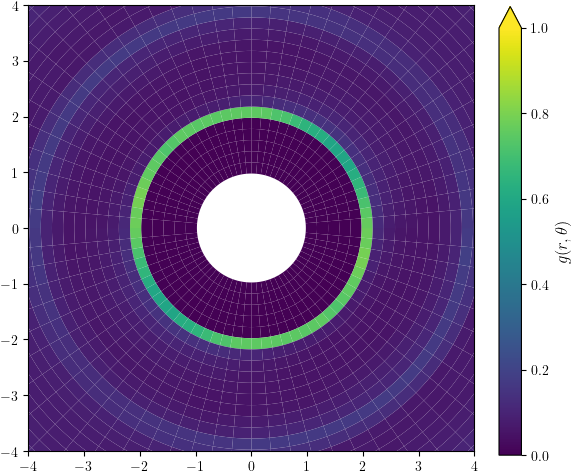

In [5]:
# Simulation data mount point and figure save path.
#mac
#topDir        = "/Volumes/rahul_2TB/high_bidispersity/new_data"
#fig_save_path = "/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/figures/paper/"

#linux
topDir        = "/media/rahul/rahul_2TB/high_bidispersity/new_data"
fig_save_path = "/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/figures/paper/"

# Some simulation parameters.
npp      = 1000
numRuns  = 1
vr       = '0.5'

phi = [0.77]
ar  = [2.0]
sizePair   = 'ss'

plt.clf()

for j in range(len(phi)):
    phir = '{:.3f}'.format(phi[j]) if len(str(phi[j]).split('.')[1]) > 2 else '{:.2f}'.format(phi[j])
    if ar[j] == 1 and sizePair != 'all':
        print(f"\n     Skipping since ar = 1 and not all pairs are considered (phi = {phir})")
        continue
    for l in range(numRuns):
        dataname = f'{topDir}/NP_{npp}/phi_{phir}/ar_{ar[j]}/Vr_{vr}/run_{l+1}'
        if os.path.exists(dataname): 
            datFile   = glob.glob(f'{dataname}/PDF_{sizePair}_*.txt')[0]
            rbin      = np.genfromtxt(datFile, skip_header=1, max_rows=1)
            thetabin  = np.genfromtxt(datFile, skip_header=2, max_rows=1)
            g_r_theta = np.genfromtxt(datFile, skip_header=5)

            fig, ax = plt.subplots(figsize=(6, 6))
            ax.grid(False)
            
            ds    = ar[j]*2 if sizePair == 'll' else 2 # unit distance
            plim  = 2 # going upto certain particles far
            tdist = ds*plim
            rlim  = np.abs(rbin - tdist*np.sqrt(2)*1.1).argmin() # closest index from plim*ds

            for ii in range(len(rbin[0:rlim]) - 1):
                for jj in range(len(thetabin) - 1):
                    theta_start = np.degrees(thetabin[jj])
                    theta_end   = np.degrees(thetabin[jj + 1])
                    r_start     = rbin[ii]
                    r_end       = rbin[ii + 1]

                    wedge = Wedge(
                        (0, 0), r_end, theta_start, theta_end,
                        width=r_end - r_start,
                        facecolor=plt.cm.viridis(g_r_theta[ii, jj]),
                        #edgecolor=(1, 1, 1, 0.5),  # Set the edge color to white
                        edgecolor='none',
                        linewidth=0, 
                        antialiased=True,
                        transform=ax.transData._b
                    )
                    ax.add_patch(wedge)
                    
            ax.set_aspect('equal')
            ax.set_xlim([-tdist, tdist])
            ax.set_ylim([-tdist, tdist])
            
            sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=0, vmax=1)) #norm=plt.Normalize(vmin=g_r_theta.min(), vmax=g_r_theta.max()))
            sm.set_array([])
            cbar = fig.colorbar(sm, ax=ax, fraction=0.0455, pad=0.05, extend='max')  # Increase 'pad' to move the colorbar to the right
            cbar.set_label(r'$g(r,\theta)$', fontsize=12)  
            
            #fig.suptitle(fr'$\phi = {phir}, \delta = {ar[j]}$', fontsize=16, x=0.6)
            plt.show()

<Figure size 640x480 with 0 Axes>

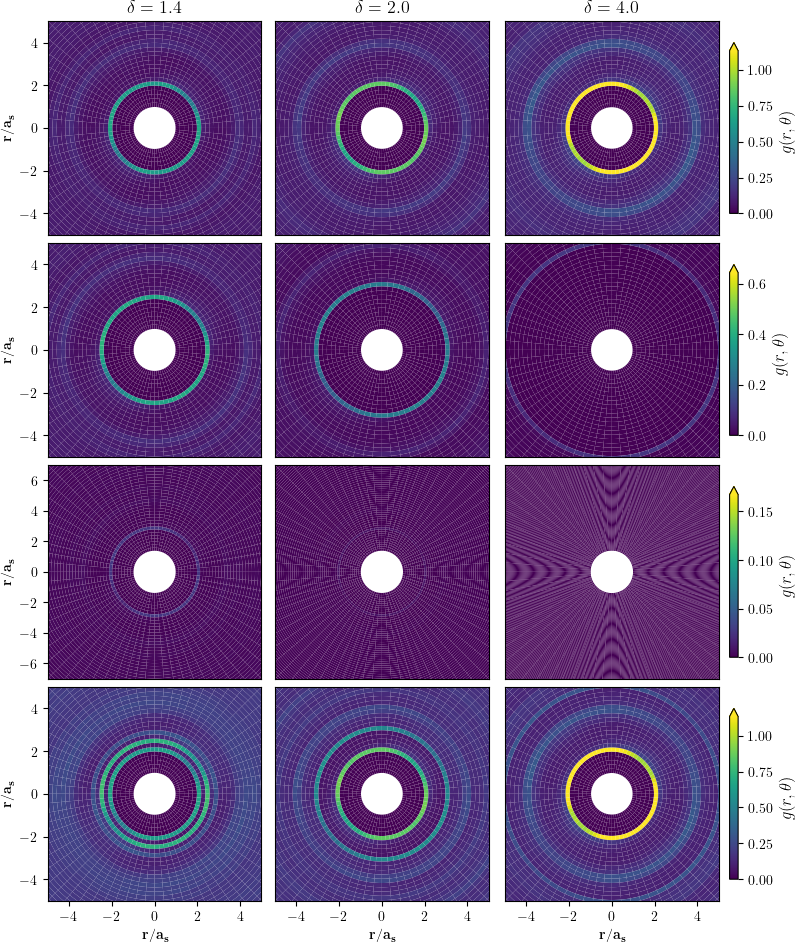

In [27]:
# Simulation data mount point and figure save path.

#mac
topDir        = "/Volumes/rahul_2TB/high_bidispersity/new_data"
fig_save_path = "/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/figures/paper/"

#linux
#topDir        = "/media/rahul/rahul_2TB/high_bidispersity/new_data"
#fig_save_path = "/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/figures/paper/"

# Some simulation parameters.
npp      = 1000
numRun   = 1
vr       = '0.5'

# phi and ar lists should be the same size
phi = [0.76, 0.77, 0.80]
ar  = [1.4, 2.0, 4.0]

sizePairs   = ['ss', 'sl', 'll', 'all']

plt.clf()
fig, ax = plt.subplots(len(sizePairs), len(phi), figsize=(8, 9.5), constrained_layout=True)
#fig.subplots_adjust(hspace=0.2, wspace=0.1)

for i, sizePair in enumerate(sizePairs):
    g_r_theta_row = []
    for j, phij in enumerate(phi):
        phir = '{:.3f}'.format(phij) if len(str(phij).split('.')[1]) > 2 else '{:.2f}'.format(phij)
        arj  = ar[j]
        dataname = f'{topDir}/NP_{npp}/phi_{phir}/ar_{arj}/Vr_{vr}/run_{numRun}'
        if os.path.exists(dataname): 
            datFile   = glob.glob(f'{dataname}/PDF_{sizePair}_*.txt')[0]
            rbin      = np.genfromtxt(datFile, skip_header=1, max_rows=1)
            thetabin  = np.genfromtxt(datFile, skip_header=2, max_rows=1)
            g_r_theta = np.genfromtxt(datFile, skip_header=5)
                
            ds    = arj if sizePair == 'll' else 1 # unit distance
            plim  = 5 # going upto certain particles far
            tdist = ds*plim
            rlim  = np.abs(rbin - tdist*np.sqrt(2)*1.1).argmin() # closest index from plim*ds
           
            for ii in range(len(rbin[0:rlim]) - 1):
                for jj in range(len(thetabin) - 1):
                    theta_start = np.degrees(thetabin[jj])
                    theta_end   = np.degrees(thetabin[jj + 1])
                    r_start     = rbin[ii]
                    r_end       = rbin[ii + 1]
    
                    g_r_theta_row.append(g_r_theta[ii, jj])
                    wedge = Wedge(
                        (0, 0), r_end, theta_start, theta_end,
                        width     = r_end - r_start,
                        facecolor = plt.cm.viridis(g_r_theta[ii, jj]),
                        edgecolor = 'none',
                        transform = ax[i][j].transData._b)
                    
                    ax[i][j].add_patch(wedge)
                    ax[i][j].set_aspect('equal')
                    ax[i][j].set_xlim([-tdist, tdist])
                    ax[i][j].set_ylim([-tdist, tdist])
                    ax[i][j].grid(False)
                    ax[0][j].set_title(fr'$\delta = {arj}$', fontsize=13)
                    ax[i][0].set_ylabel(r'$\mathbf{r / a_{s}}$')
                    ax[-1][j].set_xlabel(r'$\mathbf{r / a_{s}}$')
                    
                    if j != 0:
                        ax[i][j].set_yticklabels([])
                        ax[i][j].set_yticks([])
                        
                    if sizePair != sizePairs[-1]:
                        ax[i][j].set_xticklabels([])
                        ax[i][j].set_xticks([])
                        
            del rbin, thetabin, g_r_theta
            
    sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=np.min(g_r_theta_row), vmax=np.max(g_r_theta_row)))
    sm.set_array([]) 
    cbar = fig.colorbar(sm, ax=ax[i, j], fraction=0.05, pad=0.05, shrink=0.8, aspect=20, extend='max')
    cbar.set_label(r'$g(r,\theta)$', fontsize=12)
    
    del g_r_theta_row
    
plt.show()